In [ ]:
my_colors = list([
        (11.0/255,72.0/255,107.0/255),#
        (59.0/255,134.0/255,134.0/255),#
        (121/255.0,189/255.0,154/255.0),#
        (207/255.0,240/255.0,158/255.0),# 
        (109.0/255,0.0/255,2.0/255),#
        (191.0/255,22.0/255,2.0/255),#
        (255/255.0,99.0/255.0,0.0/255.0),#
        (255/255.0,196.0/255.0,17.0/255.0),# 
        (20.0/255,51.0/255,140.0/255),
        (17.0/255,120.0/255,178.0/255),
        (102.0/255,176.0/255,206.0/255),
        (171.0/255,208.0/255,228.0/255)])
 

# MOs and AOs

In [1]:
### Some modules
import numpy as np
%matplotlib inline
from  matplotlib import pyplot as plt
import pylab
import seaborn
import pandas as pd
plt.style.use('bmh')
import seaborn as sns
import pandas as pd
import csv
from itertools import cycle, islice
from matplotlib.font_manager import FontProperties
import Readmolden
from Readmolden import Molecule
import os
import sys
import scipy
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from Tools import get_lastfile,makemovie


### This help us to print Optimization paths
def print_ene(files,labels,colors,mol,linit=2,lfinal=0,benchmark=None,benchlabel=None):
    for i, mol in enumerate(files):
        with open(mol+'.txt') as tape:
             data = tape.read()

        data = data.split('\n')
        data = data[linit:len(data)-lfinal]
        step = np.array([float(row.split(' ')[0]) for row in data])
        ene = np.array([float(row.split(' ')[1]) for row in data])
        plt.plot(step,ene,'v',linestyle='-',color=mol_color[i],label=labels[i])
    plt.xlabel('Steps')
    plt.ylabel('Energy (H)')
    plt.legend(loc='best')
    plt.title('Optimization of '+mol+' with BFGS')
    for line in benckmark:
        hline = plt.axhline(line,label=benchlabel)
    plt.legend(loc='best')
    #pylab.savefig(mol+"-ene.png")

    plt.plot()
    
### This print a 2d like orbs
#print_2Dorb
def print_2Dorb(filename,folder,label,norb,molname):
    first,last,index = get_lastfile(folder,filename)
    files = [first,last]
    indexes = [0,index]
    mols = []
    for tape in files:
        mols.append(Molecule(tape))
    
    for j in range(norb):
        x = np.arange(-10,10,0.01)
        plt.figure(j,(4,5)) 
        for i, mol in enumerate(mols):
            alpha = mol.gauss[j].exp
            l = mol.gauss[j].l
            exp = np.exp(-alpha*x**2)
            #print ('l',l)
            if 1==l[0]+l[1]+l[2]:
                exp *=x
            norm = scipy.integrate.simps(exp*exp,x)
            if i%skip == 0:
                plt.plot(x,exp/np.sqrt(norm),label='Step: '+str(indexes[i]))
        plt.xlabel('r')
        plt.ylabel('Amplitude')
        plt.legend(loc='best')
        #plt.title("Optimization of "+molname+" with BFGS of "+str(label[j]))
        plt.legend(loc='best')
        #pylab.savefig(str(label[j-2].replace(" ",""))+"-"+mol+"-sto-2g.png")
        plt.plot()


### This plots countours.
def print_orbcont(filename,folder,label,norb,molname,mos=False):
    first,last,index = get_lastfile(folder,filename)
    files = [first,last]
    indexes = [0,index]
    mols = []
    for tape in files:
        mols.append(Molecule(tape))
    
    natoms = len(mols[0].atoms)
    xarray = np.zeros((natoms, ))
    yarray = np.zeros((natoms, ))
    zarray = np.zeros((natoms, ))
    white = (1,1,1)
    gray = (0.5, 0.5, 0.5)
    red = (1, 0, 0)
    green = (0, 1, 0)
    blue = (0, 0, 1)
    color_dict = {1: (1, 1, 1), 9: red, 3:green, 6: gray, 8: red, 7:green}
    scale_dict = {1: 0.5, 9: 0.6, 7:1.4,  6: 1.5, 8: 1.5, 3:1.5}
    
    dgrid = 100
    y = 0.0
    x = np.linspace(min(xarray)-3.0,max(xarray)+3.0,dgrid)
    z = np.linspace(min(zarray)-3.0,max(zarray)+3.0,dgrid)
    y = np.linspace(min(yarray)-3.0,max(yarray)+3.0,dgrid)

    xs,zs,ys = np.meshgrid(x,y,z)
    cmaps = ['Blues','Reds']
    for j in range(norb):
        plt.figure(j,(5,5)) 
        for i, mol in enumerate(mols):
            if mos != None:
                fxyz = mol.getMOvalue(j,xs,ys,zs,[dgrid,dgrid,dgrid],nao=j)
            else:
                fxyz = mol.getMOvalue(j,xs,ys,zs,[dgrid,dgrid,dgrid])
            #print fxyz.shape
            #print xs.shape
            levels = 4
            #plt.contour(x,z,fxyz[:,50,:],levels,cmap='jet') 
            CS = plt.contour(x,z,fxyz[:,dgrid/2,:],levels,cmap=cmaps[i],label='Step: '+str(indexes[i]))
            #plt.colorbar()
            #plt.clabel(CS, inline=1, fontsize=10)
        #plt.xlimit([-0.5,0.5])
        #plt.xlabel('r')
        #plt.ylabel('Amplitude')
        plt.legend(loc='best')
        plt.title("Optimization of "+molname+" with BFGS of "+label[j])
        plt.legend(loc='best')
        plt.colorbar() 
        #pylab.savefig(str(label[j-2].replace(" ",""))+"-"+mol+"-sto-2g.png")
        plt.plot()
        


def arctanmapint(init,final,n):
    #linalg = np.linspace(0,4*np.pi,endpoint=True)
    true = np.linspace(init,final,endpoint=True)
    arctan = np.arctan(linalg)
    maximum = arctan
    arctan = arctan/maximum
    return true*arctan + init

In [2]:
def print_orbcont_shifted(filename,folder,label,norb,molname,mos=None,extra=None,rootname=None,density=False,ne=2,lin=False):
    '''It prints contour surfaces of of MOs and AOs'''
   
    first,last,index = get_lastfile(folder,filename)
    files = [first,last]
    nx = 2
    ny = 1
    if extra != None:
        for i in extra:
            files.append(i)
        ny += int((len(extra)+1)/2)
    
    indexes = [0,index]
    mols = []
    for tape in files:
        mols.append(Molecule(tape))
    print (files) 
    natoms = len(mols[0].atoms)
    xarray = np.zeros((natoms, ))
    yarray = np.zeros((natoms, ))
    zarray = np.zeros((natoms, ))
    white = (1,1,1)
    gray = (0.5, 0.5, 0.5)
    red = (1, 0, 0)
    green = (0, 1, 0)
    blue = (0, 0, 1)
    color_dict = {1: (1, 1, 1), 9: red, 3:green, 6: gray, 8: red, 7:green}
    scale_dict = {1: 0.5, 9: 0.6, 7:1.4,  6: 1.5, 8: 1.5, 3:1.5}
    
    dgrid = 100
    
    x = np.linspace(min(xarray)-3.0,max(xarray)+3.0,dgrid)
    z = np.linspace(min(zarray)-3.0,max(zarray)+3.0,dgrid)
    y = np.linspace(min(yarray)-3.0,max(yarray)+3.0,dgrid)
    print('files',files)
    xs,zs,ys = np.meshgrid(x,y,z)
    cmaps = ['Blues','Reds']
    axs = []
    if density:
        norb = 1
    for j in range(norb):
        f = plt.figure(figsize = (6*nx,6*ny))
        #plt.title("Optimization for the molecule "+molname+" of"+label[j])
        plt.axis('equal')
        ax1 = plt.subplot2grid((ny, nx), (0, 0))
        ax2 = plt.subplot2grid((ny, nx), (0, 1))
        lists = [ax1,ax2]
        if extra != None:
            for i in range(len(extra)):
                ax3 = plt.subplot2grid((ny, nx), (int((i+2)/2),int((i+2)%2) ))
                lists.append(ax3)
        fxyzs = []
        for i, mol in enumerate(mols):
            print (ne)
            if density:
                fxyzs.append(mol.getDensity(xs,ys,zs,dgrid,ne=ne))
            elif mos == None:
                fxyzs.append(mol.getMOvalue(j,xs,ys,zs,dgrid,nao=j))
                #fxyzs.append(np.arctan(np.absolute(mol.getMOvalue(j,xs,ys,zs,[dgrid,dgrid,dgrid],nao=j))))
            else:
                fxyzs.append(mol.getMOvalue(j,xs,ys,zs,dgrid))
                #fxyzs.append(np.arctan(np.absolute(mol.getMOvalue(j,xs,ys,zs,[dgrid,dgrid,dgrid]))))
        limit_max = max([np.amax(fxyz) for fxyz in fxyzs])
        limit_min = min([min([np.abs(np.amin(fxyz)) for fxyz in fxyzs])])
        try:
            levels = levels_dic[folder](limit_min,limit_max)
        except:
            levels = np.arctan(np.linspace(limit_min,limit_max, 100))
        for i,fxyz  in enumerate(fxyzs):
            for atom in mols[i].atoms:
                   lists[i].plot([atom.xyz[0]],[atom.xyz[2]],"o")
            print (i,j)
            #lists[i].contourf(x,z,abs(fxyz[:,dgrid/2,:]),levels,cmap='jet',label='Step: '+str(indexes[j]))
            
            lists[i].axis('off')
            ### Pos
            CS = lists[i].contour(x,y,np.abs(fxyz[:,:,dgrid/2]),levels,cmap='jet')
            lists[i].clabel(CS, inline=1, fontsize=10)
            lists[i].legend(loc='best')
            ## Neg
            #CS = lists[i].contour(x,y,fxyz[:,:,dgrid/2],reversed(-1*levels),cmap='jet')
            lists[i].clabel(CS, inline=1, fontsize=10)
            lists[i].legend(loc='best')
            lists[i].title.set_text(label[i])
            #lists[i].colorbar() 
            
        lists[i].legend(loc='best')
        #plt.colorbar()
        if rootname != None:
             pylab.savefig(rootname+label[j]+".png")
        #plt.suptitle("Optimization of "+molname+" with BFGS of "+label[j])
        #pylab.savefig(str(label[j].replace(" ",""))+"-"+molname+".png")
        plt.plot()

In [3]:
def h2o_levels(limit_min,limit_max):
    print(limit_min,limit_max)
    return  np.arctan(np.linspace(0,1e-3*limit_max,10))

def hf_levels(limit_min,limit_max):
    print(limit_min,limit_max)
    return  np.arctan(np.linspace(0,limit_max,10))
    return  np.arctan(np.linspace(0,0.5e-3*limit_max,10))

def ch4_levels(limit_min,limit_max):
    print(limit_min,limit_max)
    return  np.arctan(np.linspace(0,1e-3*limit_max,10))

def nh3_levels(limit_min,limit_max):
    print(limit_min,limit_max)
    return  np.arctan(np.linspace(0,1e-3*limit_max,10))

levels_dic={}
levels_dic['h2o'] = h2o_levels
levels_dic['hf'] = hf_levels
levels_dic['ch4'] = ch4_levels
levels_dic['nh3'] = nh3_levels

# H2O

In [1]:
file='h2o-sto-2g'
molfolder ='h2o'
label = ['STO-2G','STO-2G optimization of width','STO-2G optimization width and position',
         'STO-3G','STO-3G optimization of width','STO-3G optimization width and position',
         'STO-6G']
listofcolors = [] 
norb = 4+2+2
mol = "H2O_density"
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden',
                                                           'h2o/h2o-sto-3g-BFGS_step_0.molden',
                                                           './h2o/h2o-a-later-z-sto-3g-BFGS_step_0.molden',
                                                           './h2o/h2o-a-later-z-sto-3g-BFGS_step_29.molden',
                                                           'h2o/h2o-sto-6g-BFGS_step_0.molden'],density=True,ne=5,lin=True)

NameError: name 'print_orbcont_shifted' is not defined

# HF

['./hf/hf-sto-2g-BFGS_step_0.molden', './hf/hf-sto-2g-BFGS_step_40.molden', './hf/hf-z-sto-2g-BFGS_step_55.molden', './hf/hf-sto-3g-BFGS_step_0.molden', './hf/hf-sto-3g-BFGS_step_27.molden', './hf/hf-z-sto-3g-BFGS_step_20.molden', 'hf/hf-sto-6g-BFGS_step_0.molden']
5
5
5
5
5
5
5
1.83566775674e-14 103.294778299
0 0
1 0
2 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


3 0
4 0
5 0
6 0


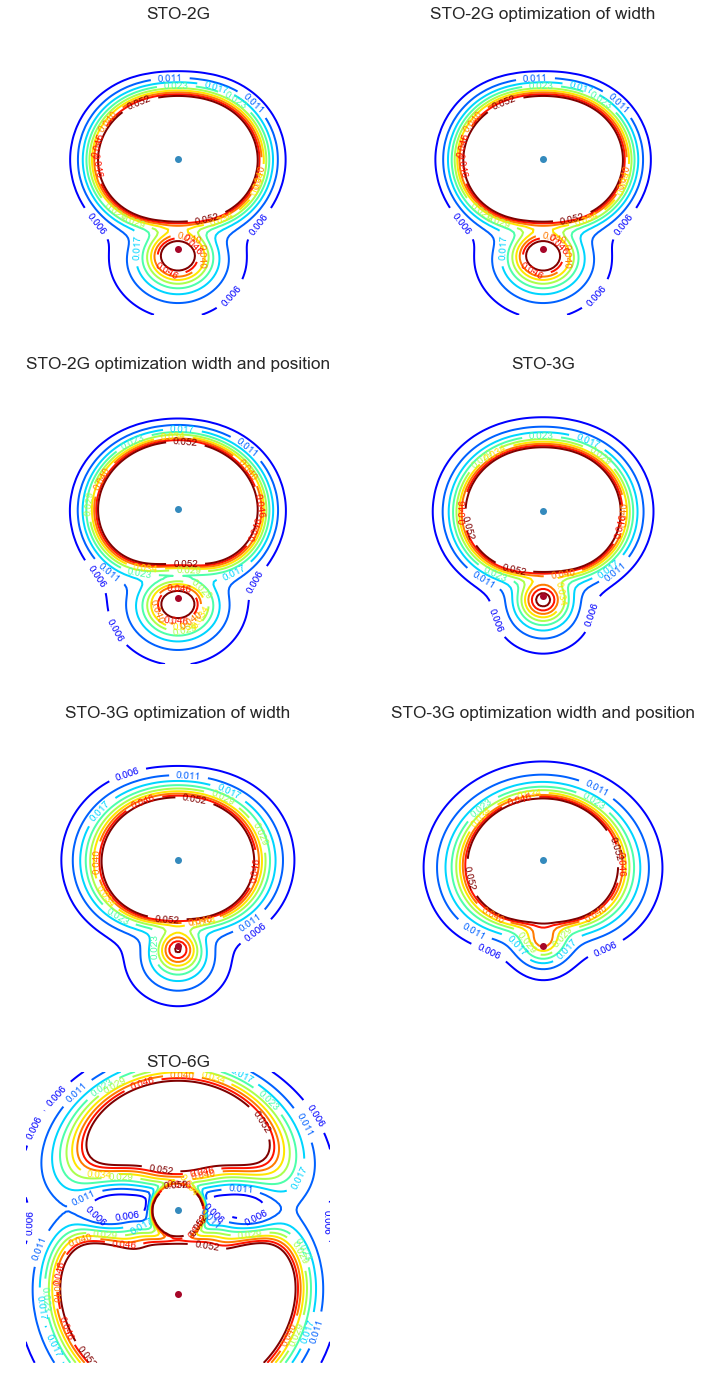

In [25]:
file='hf-sto-2g'
molfolder ='hf'
label = ['STO-2G','STO-2G optimization of width','STO-2G optimization width and position',
         'STO-3G','STO-3G optimization of width','STO-3G optimization width and position',
         'STO-6G']
listofcolors = [] 
norb = 4+2+2
mol = "HF_density"
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./hf/hf-z-sto-2g-BFGS_step_55.molden',
                                                           './hf/hf-sto-3g-BFGS_step_0.molden',
                                                           './hf/hf-sto-3g-BFGS_step_27.molden',
                                                           './hf/hf-z-sto-3g-BFGS_step_20.molden',
                                                           'hf/hf-sto-6g-BFGS_step_0.molden'],
                      density=True,ne=5,lin=True)

In [26]:
# CH$_4$

['./ch4/ch4-sto-2g-BFGS_step_0.molden', './ch4/ch4-sto-2g-BFGS_step_47.molden', './ch4/ch4-a-and-z-sto-2g-BFGS_step_29.molden', './ch4/ch4-sto-3g-BFGS_step_0.molden', './ch4/ch4-sto-3g-BFGS_step_44.molden', './ch4/ch4-a-later-z-sto-3g-BFGS_step_9.molden', './ch4/ch4-sto-6g-BFGS_step_0.molden']
5
5
5
5
5
5
5
1.38769818676e-07 34.0311774471
0 0
1 0
2 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


3 0
4 0
5 0
6 0


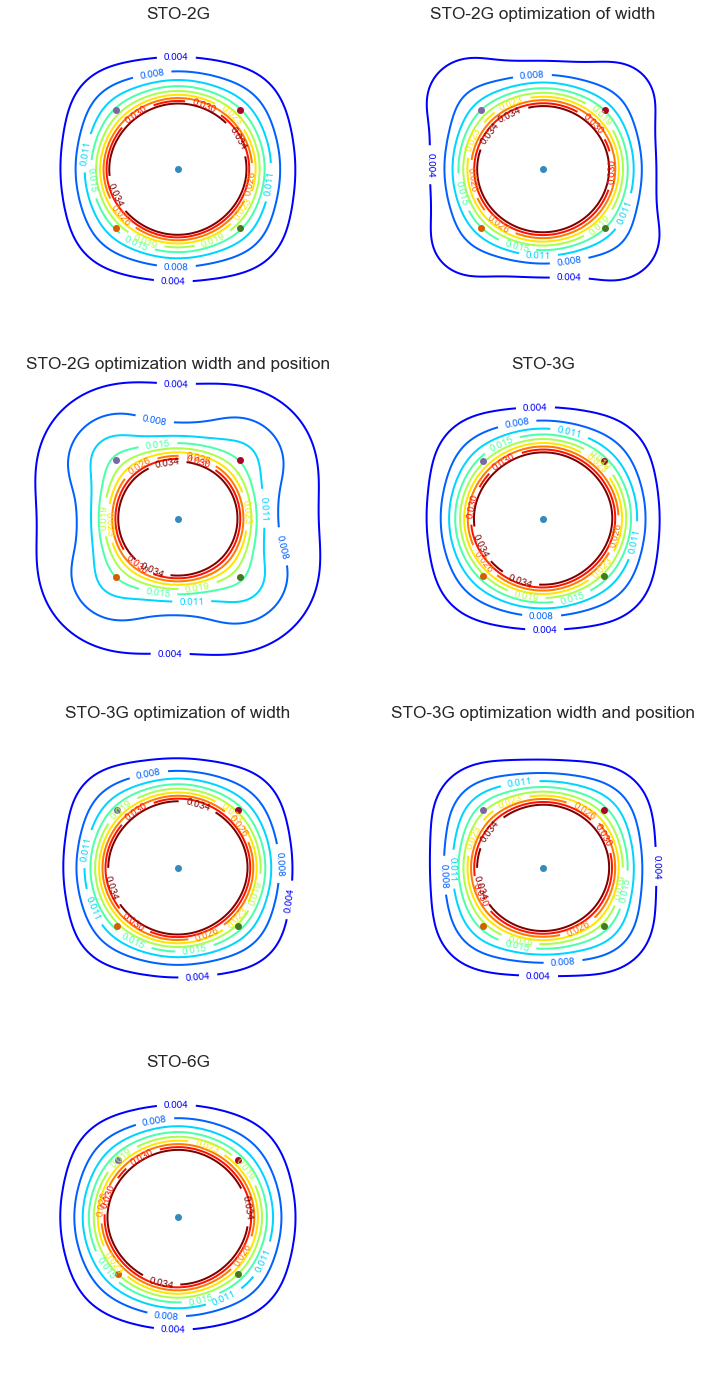

In [27]:
 file='ch4-sto-2g'
molfolder ='ch4'
label = ['STO-2G','STO-2G optimization of width','STO-2G optimization width and position',
         'STO-3G','STO-3G optimization of width','STO-3G optimization width and position',
         'STO-6G']
listofcolors = [] 
norb = 4+2+2
mol = 'CH4_density'
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./ch4/ch4-a-and-z-sto-2g-BFGS_step_29.molden',
                                                           './ch4/ch4-sto-3g-BFGS_step_0.molden',
                                                           './ch4/ch4-sto-3g-BFGS_step_44.molden',
                                                           './ch4/ch4-a-later-z-sto-3g-BFGS_step_9.molden',
                                                           './ch4/ch4-sto-6g-BFGS_step_0.molden'],
                      density=True,ne=5,lin=True)

# NH$_3$

['./nh3/nh3-sto-2g-BFGS_step_0.molden', './nh3/nh3-sto-2g-BFGS_step_53.molden', './nh3/nh3-a-later-z-sto-2g-BFGS_step_29.molden', './nh3/nh3-sto-3g-BFGS_step_0.molden', './nh3/nh3-sto-3g-BFGS_step_51.molden', './nh3/nh3-a-later-z-sto-3g-BFGS_step_9.molden', './nh3/nh3-sto-6g-BFGS_step_0.molden']
5
5
5
5
5
5
5
6.07440549897e-08 52.8436027953
0 0
1 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


2 0
3 0
4 0
5 0
6 0


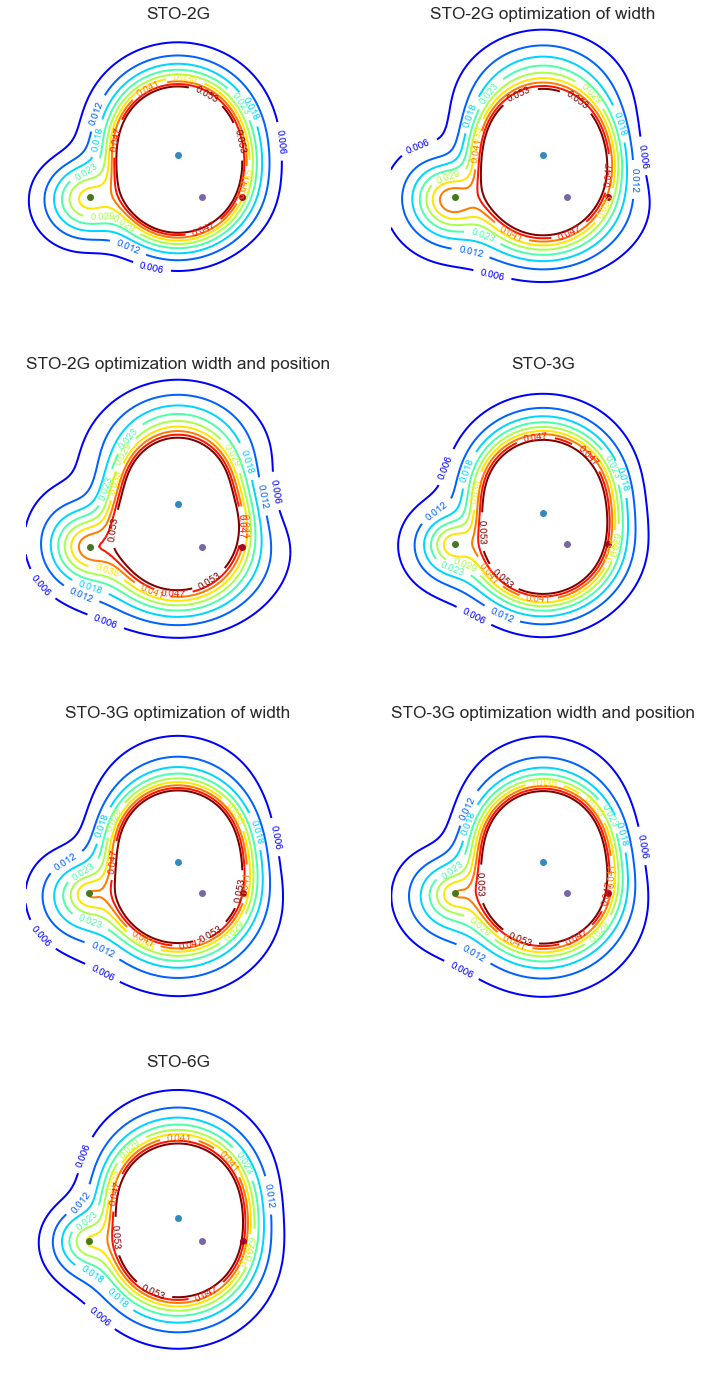

In [28]:
file='nh3-sto-2g'
molfolder ='nh3'
label = ['STO-2G','STO-2G optimization of width','STO-2G optimization width and position',
         'STO-3G','STO-3G optimization of width','STO-3G optimization width and position',
         'STO-6G']
listofcolors = [] 
norb = 4+2+2
mol = "NH3_density"
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./nh3/nh3-a-later-z-sto-2g-BFGS_step_29.molden',
                                                           './nh3/nh3-sto-3g-BFGS_step_0.molden',
                                                           './nh3/nh3-sto-3g-BFGS_step_51.molden',
                                                           './nh3/nh3-a-later-z-sto-3g-BFGS_step_9.molden',
                                                           './nh3/nh3-sto-6g-BFGS_step_0.molden'],
                      density=True,ne=5,lin=True)

['./h2o/h2o-sto-2g-BFGS_step_0.molden', './h2o/h2o-sto-2g-BFGS_step_57.molden', './h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden']
2
2
2
0.00026744153783 8.71612840382
0 0
1 0
2 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


2
2
2
0.0 11.1365997934
0 1
1 1
2 1
2
2
2
6.08866634641e-117 3.7497644543
0 2
1 2
2 2
2
2
2
1.03265219393e-08 0.494833456001
0 3
1 3
2 3
2
2
2
1.00488425028 1.84053622843
0 4
1 4
2 4
2
2
2
1.00488425028 1.36091137092
0 5
1 5
2 5
2
2
2
1.00104280652 1.42259432147
0 6
1 6
2 6
2
2
2
0.359696197159 0.520188129547
0 7
1 7
2 7
2
2
2
0.352133164429 0.359696197159
0 8
1 8
2 8
2
2
2
0.359386070542 0.374998173057
0 9
1 9
2 9
2
2
2
7.86086943327e-34 1.06088888994
0 10
1 10
2 10
2
2
2
1.7879029843e-06 0.264207416479
0 11
1 11
2 11
2
2
2
7.86086943327e-34 1.06089785464
0 12
1 12
2 12
2
2
2
1.7879029843e-06 0.264207410543
0 13
1 13
2 13


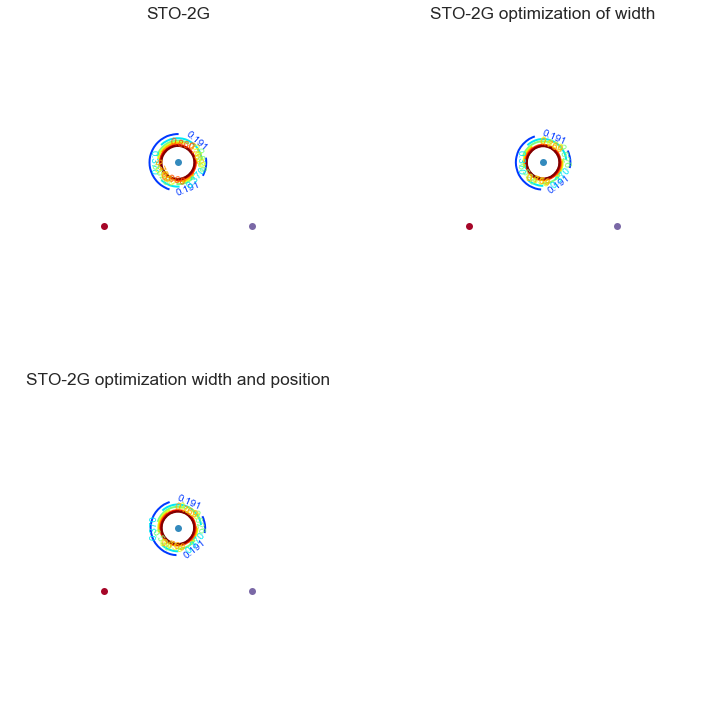

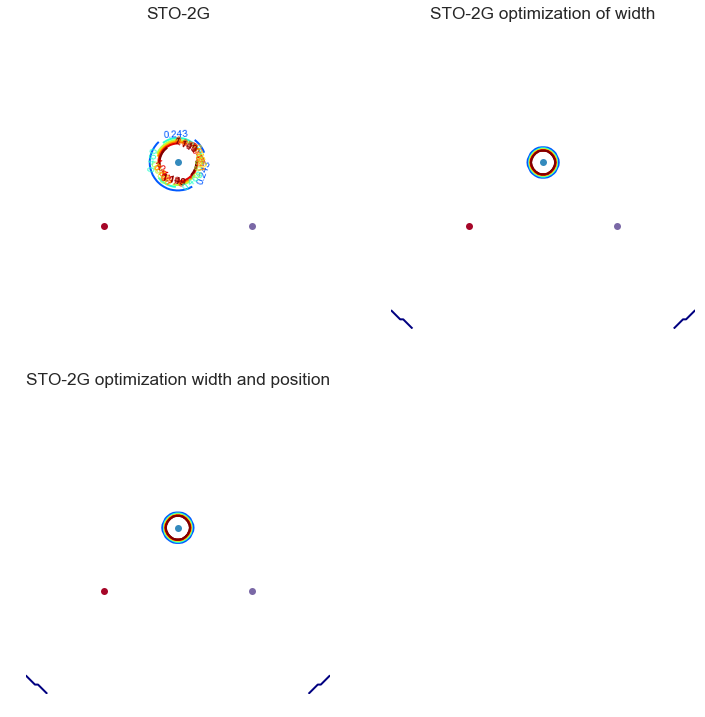

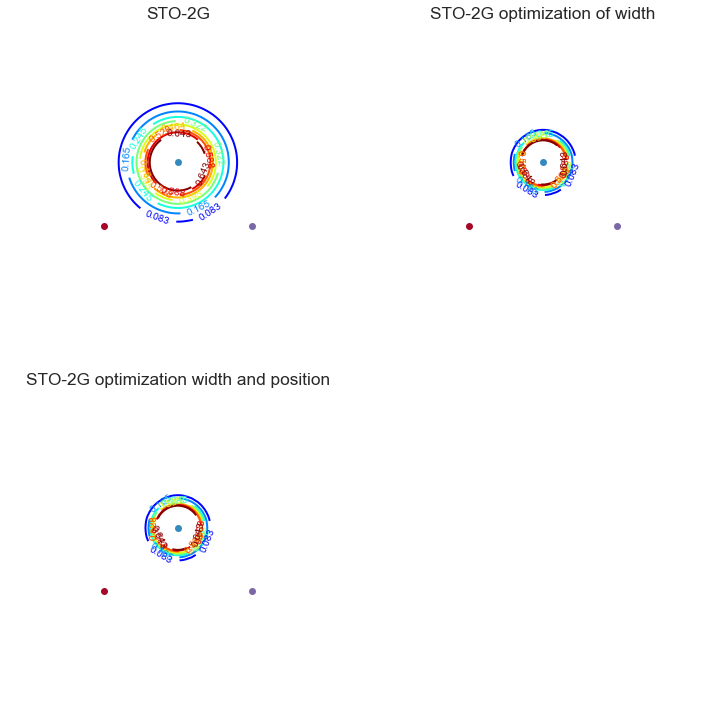

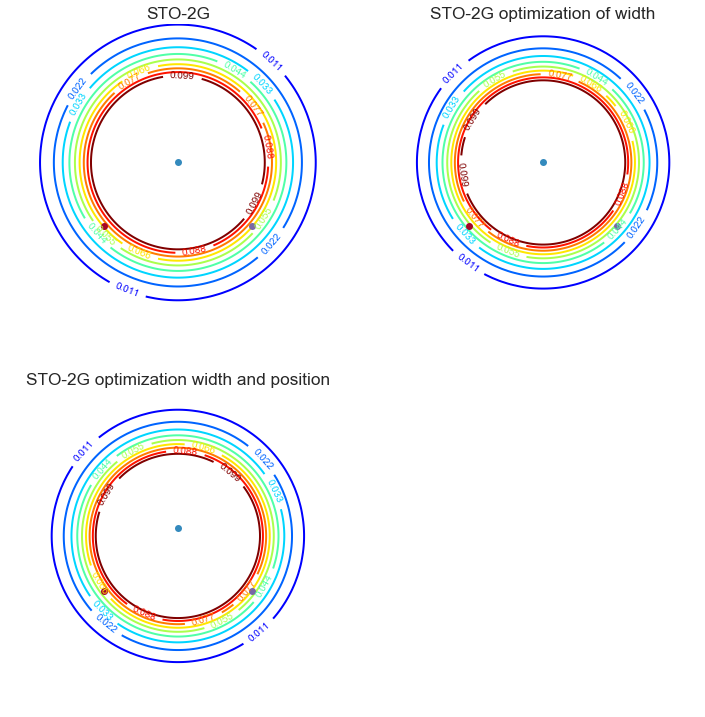

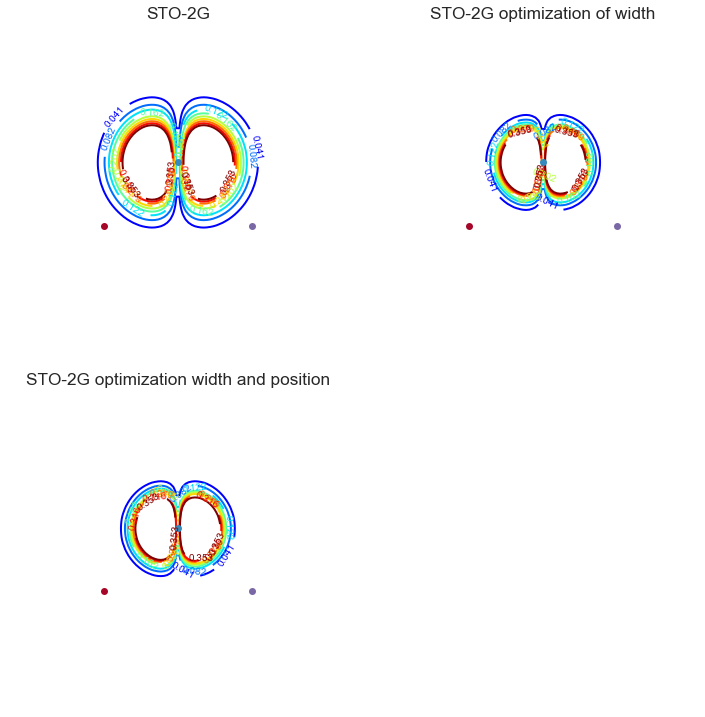

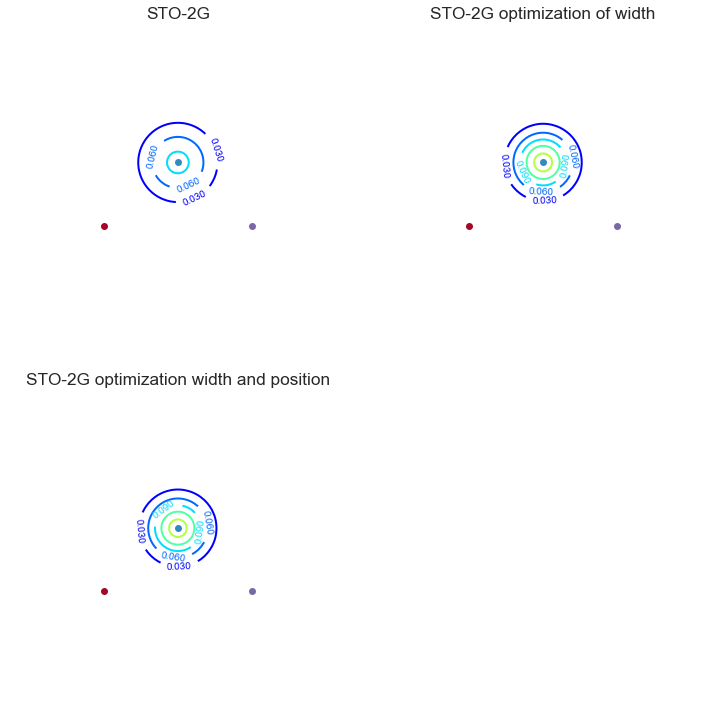

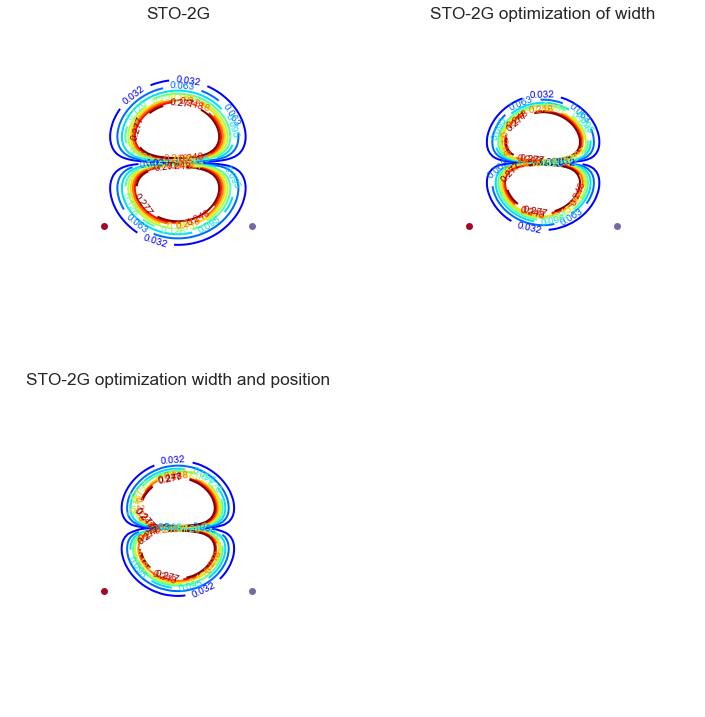

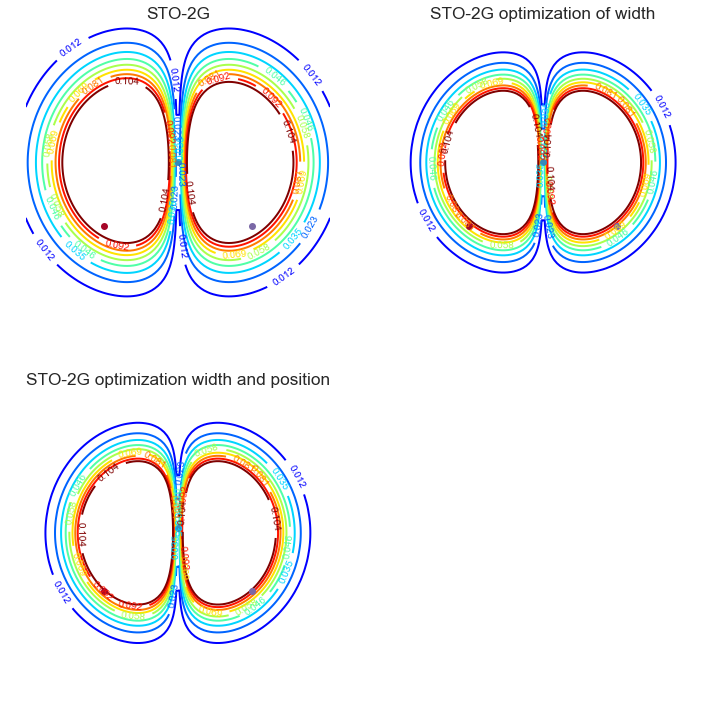

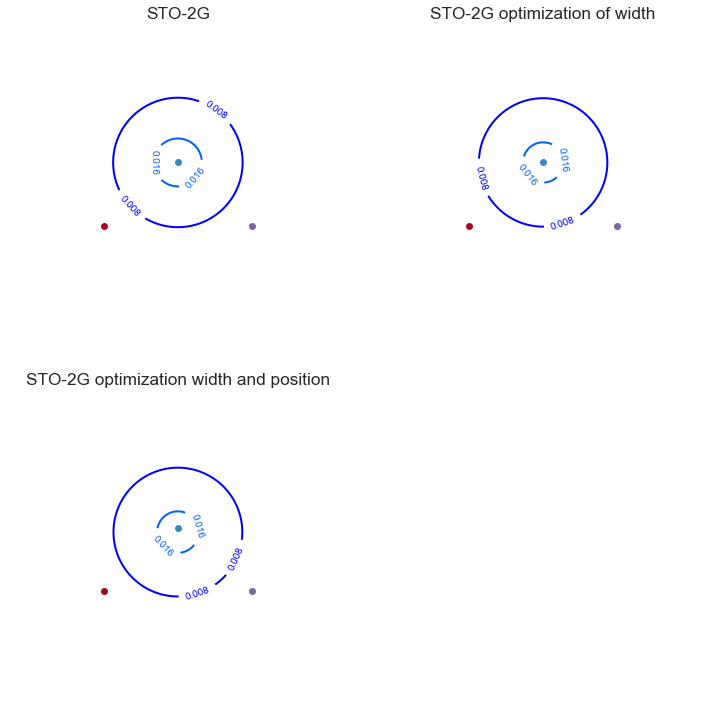

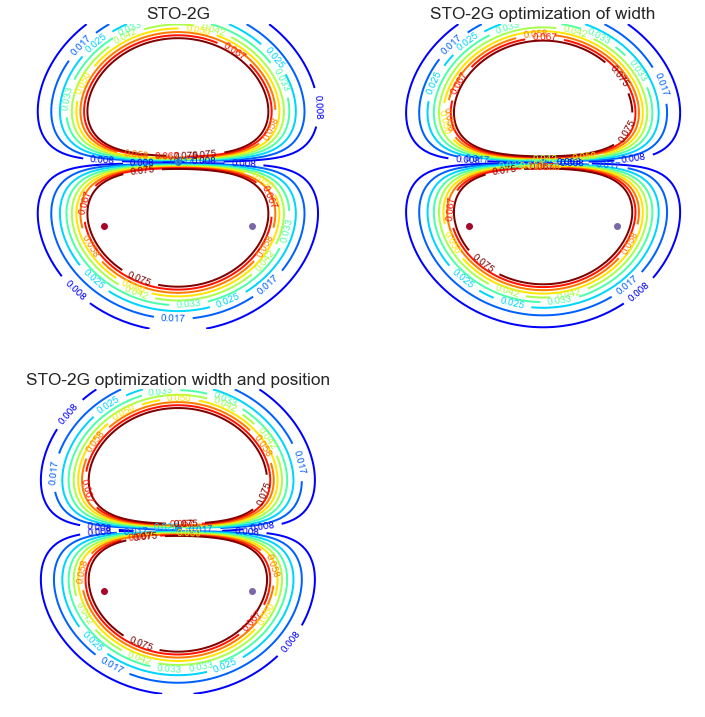

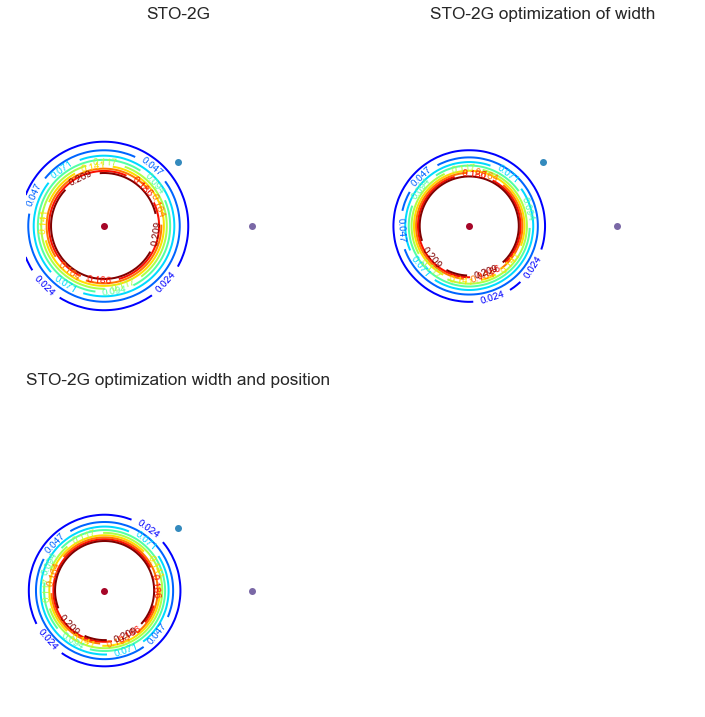

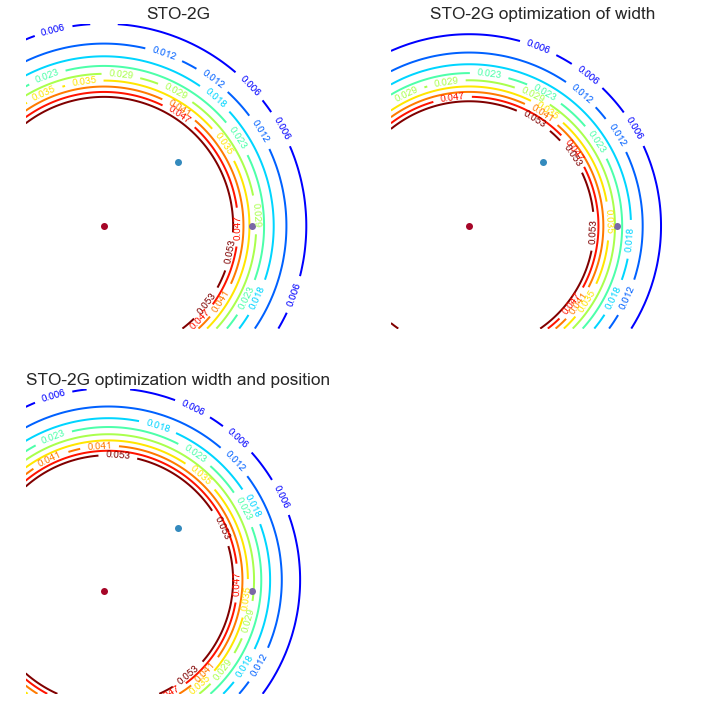

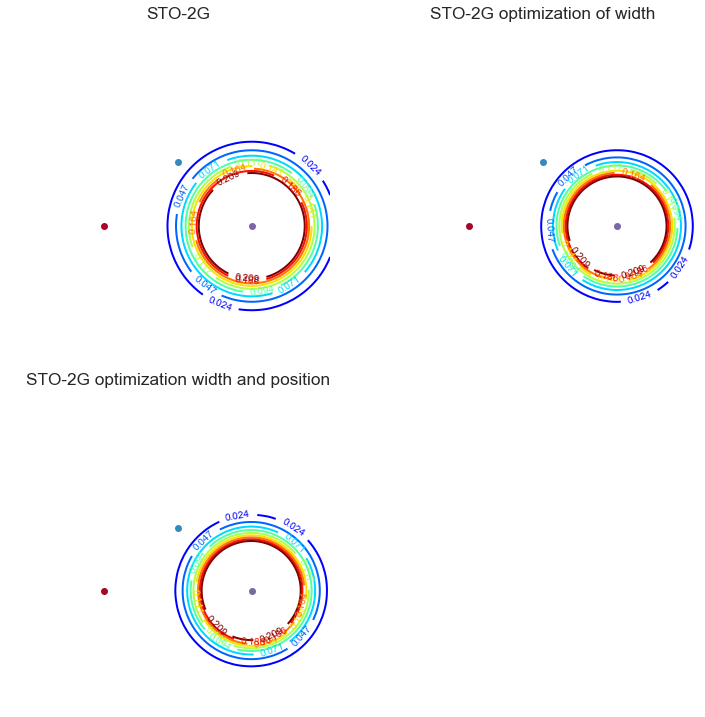

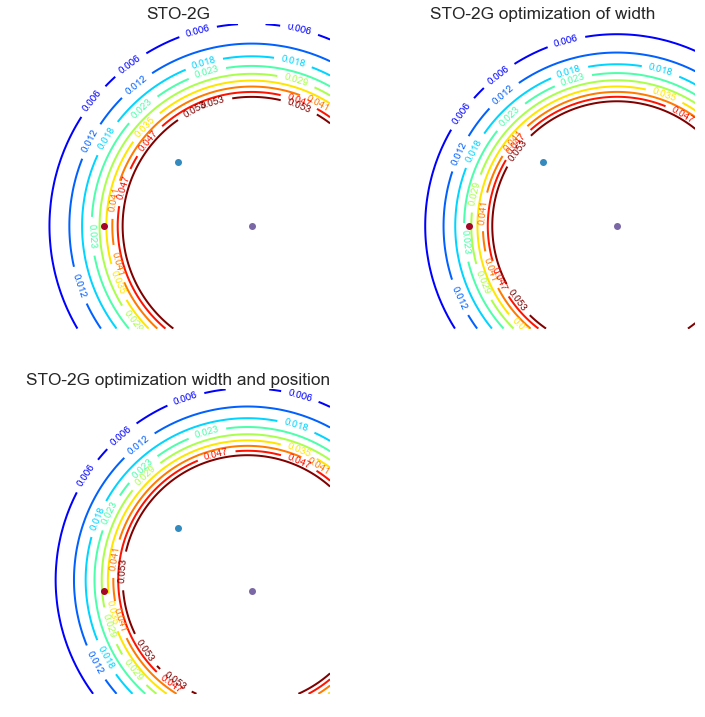

In [35]:
file='h2o-sto-2g'
molfolder ='h2o'
label = ['STO-2G','STO-2G optimization of width','STO-2G optimization width and position',
         'STO-3G','STO-3G optimization of width','STO-3G optimization width and position',
         'STO-6G']
listofcolors = [] 
norb = 4+2+2+2+4
mol = "H2O_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol,mos=None,extra=['./h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden'])#,'h2o/h2o-sto-6g-BFGS_step_0.molden'])

# HF

['./hf/hf-sto-2g-BFGS_step_0.molden', './hf/hf-sto-2g-BFGS_step_40.molden', './hf/hf-z-sto-2g-BFGS_step_55.molden']
files ['./hf/hf-sto-2g-BFGS_step_0.molden', './hf/hf-sto-2g-BFGS_step_40.molden', './hf/hf-z-sto-2g-BFGS_step_55.molden']
2
2
2
0.00217671241723 9.90580482201
0 0
1 0
2 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


2
2
2
0.0 12.961151506
0 1
1 1
2 1
2
2
2
1.8486886596e-146 4.47052230713
0 2
1 2
2 2
2
2
2
1.22457435466e-10 0.584288951544
0 3
1 3
2 3
2
2
2
1.70832252057 1.71593716143
0 4
1 4
2 4
2
2
2
1.70789592895 1.71592242169
0 5
1 5
2 5
2
2
2
1.99264211584 2.00567735385
0 6
1 6
2 6
2
2
2
0.446523787789 0.449037181433
0 7
1 7
2 7


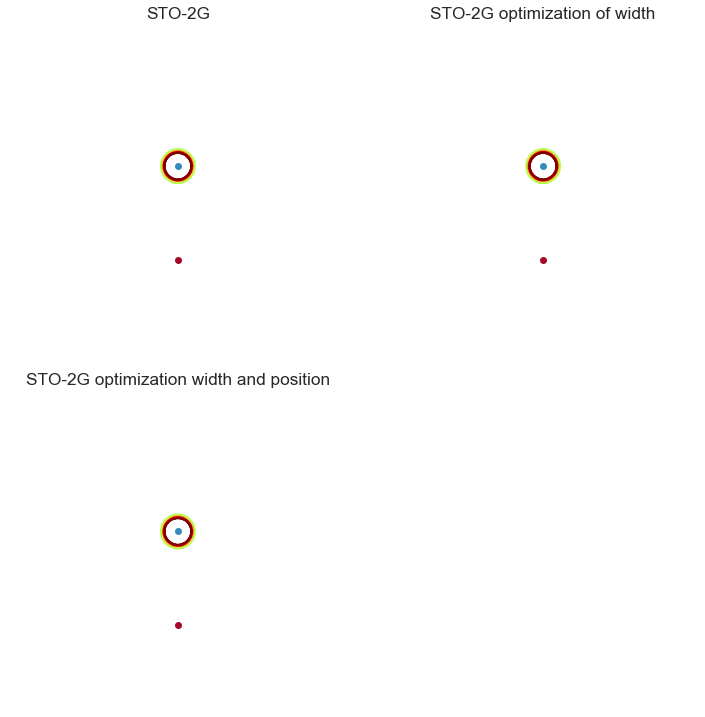

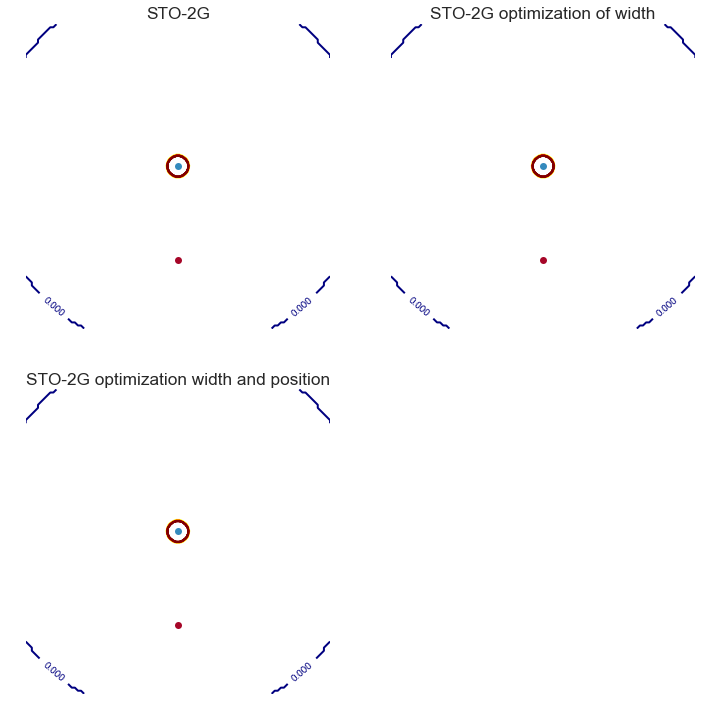

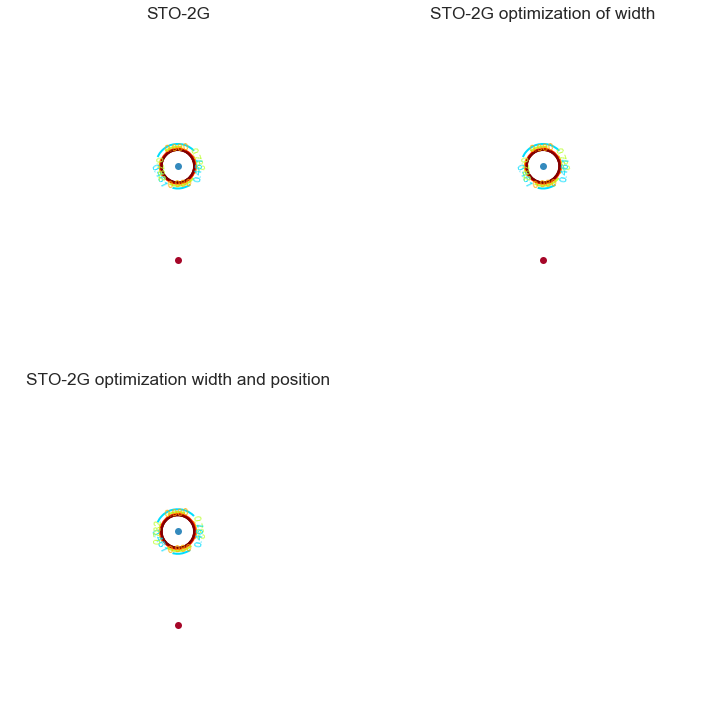

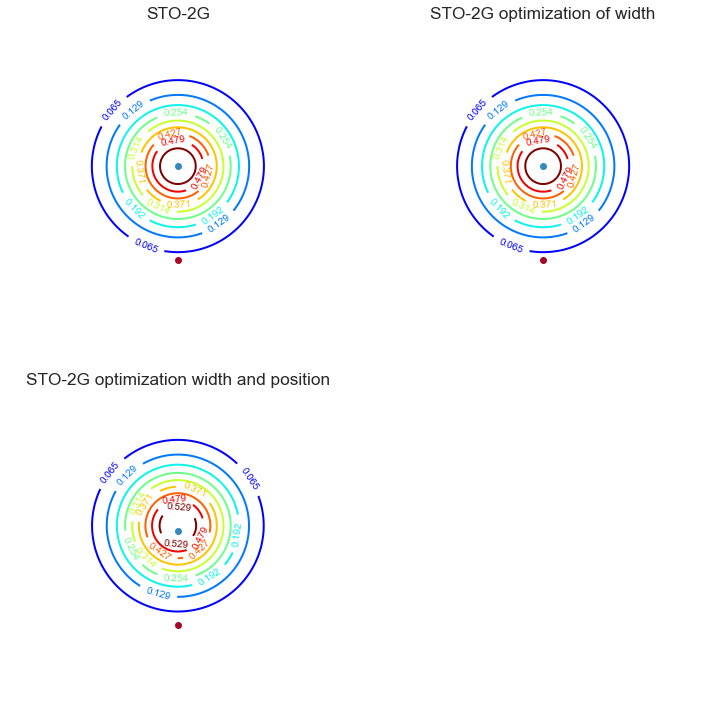

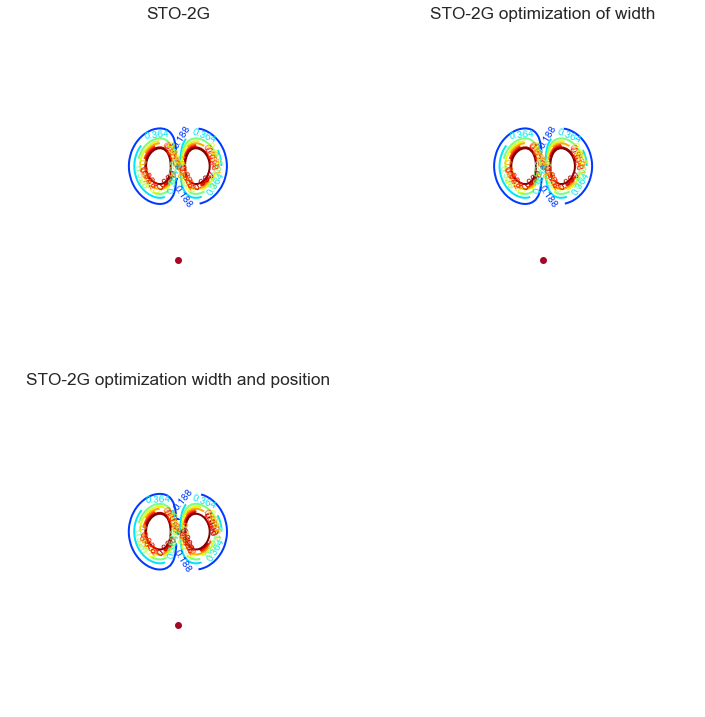

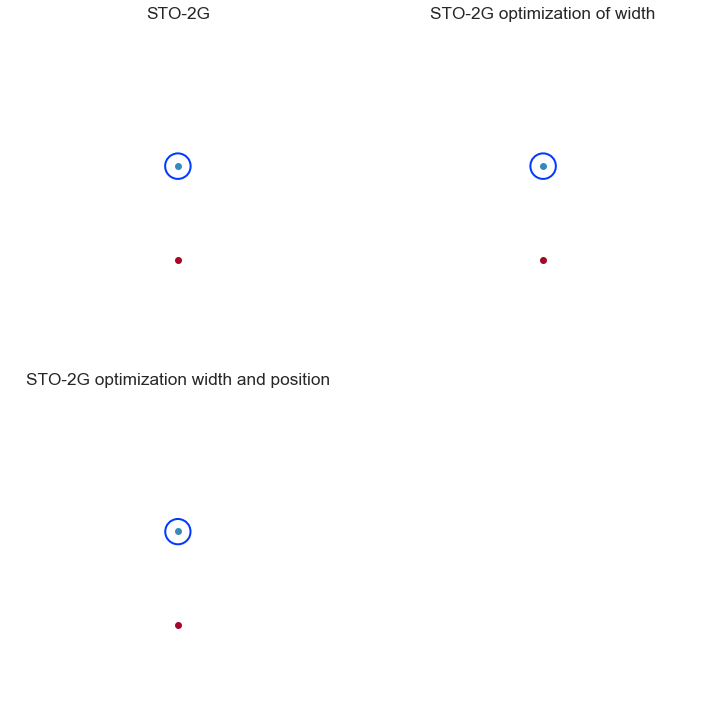

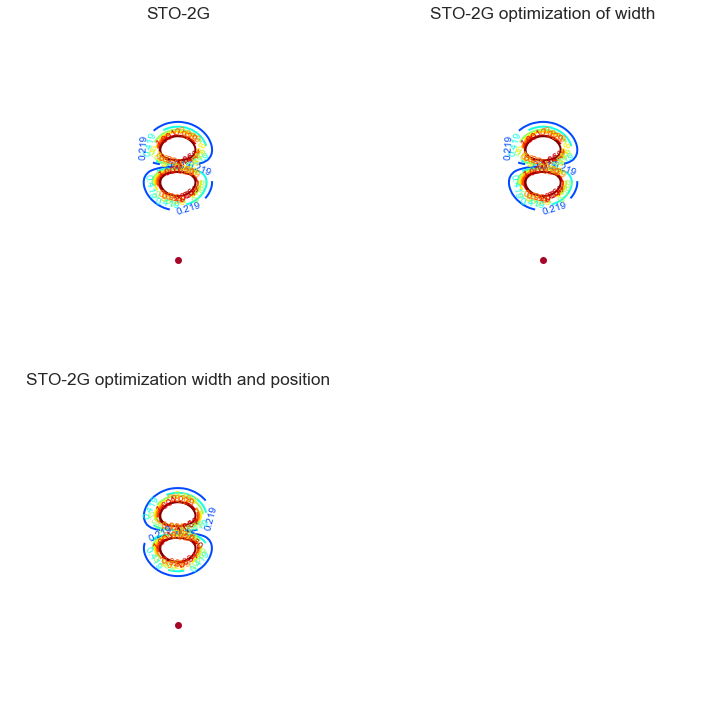

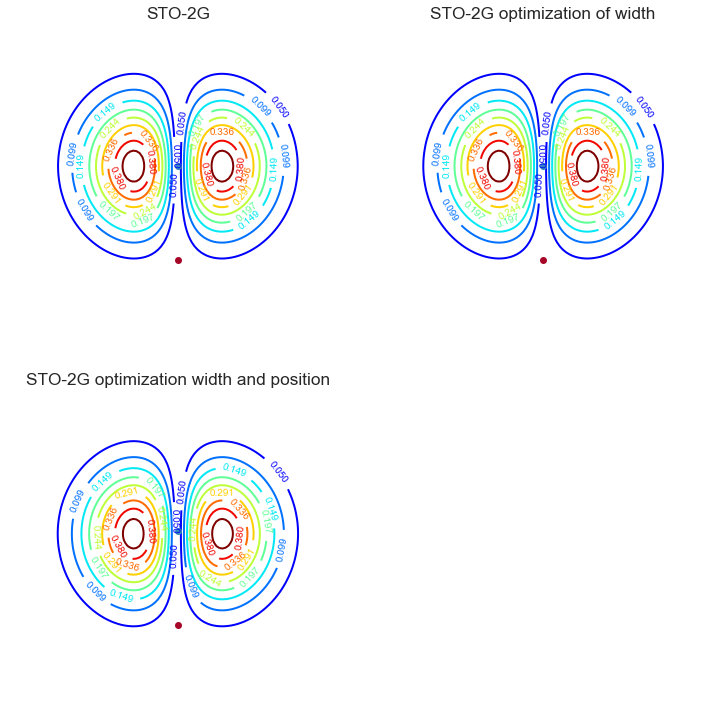

In [4]:
file='hf-sto-2g'
molfolder ='hf'
label = ['STO-2G','STO-2G optimization of width','STO-2G optimization width and position',
         'STO-3G','STO-3G optimization of width','STO-3G optimization width and position',
         'STO-6G']
listofcolors = [] 
norb = 4+2+2
mol = "HF_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol,mos=None,extra=['./hf/hf-z-sto-2g-BFGS_step_55.molden'])#,'h2o/h2o-sto-6g-BFGS_step_0.molden'])

In [5]:
filenames = []
prefix = './hf/hf-sto-2g-BFGS_step_'
for i in range(40):
    filename = prefix+str(i)+'.molden'
    filenames.append(filename)
prefix = './hf/hf-z-sto-2g-BFGS_step_'
for i in range(0,30):
    filename = prefix+str(i)+'.molden'
    filenames.append(filename)
molfolder ='h2o'
label = ['O 1s','O 2s','O 3s','O 4s','O 2p$_x$','O 2p$_y$','O 2p$_z$', 'O 3p$_x$', 'O 3p$_y$', 'F 3p$_z$',
         'H 1s','1H 2s']
norb = [11]
mol = "HF_"
print_orb_optimization(filenames,label,norb,mol,extra='hf/hf-sto-6g-BFGS_step_0.molden')


NameError: name 'print_orb_optimization' is not defined

['./h2o/h2o-sto-2g-BFGS_step_0.molden', './h2o/h2o-sto-2g-BFGS_step_57.molden', './h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden', './h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden', 'h2o/h2o-sto-6g-BFGS_step_0.molden']
False
7.69135569875e-07 8.71612840382
[  7.69135570e-07   8.78160283e-02   1.74297412e-01   2.58228762e-01
   3.38604508e-01   4.14682159e-01   4.85992090e-01   5.52313313e-01
   6.13628981e-01   6.70074847e-01   7.21890207e-01   7.69376545e-01
   8.12865632e-01   8.52696658e-01   8.89200958e-01   9.22692597e-01
   9.53463208e-01   9.81779739e-01   1.00788412e+00   1.03199411e+00
   1.05430480e+00   1.07499045e+00   1.09420646e+00   1.11209127e+00
   1.12876826e+00   1.14434738e+00   1.15892671e+00   1.17259386e+00
   1.18542719e+00   1.19749688e+00   1.20886590e+00   1.21959083e+00
   1.22972264e+00   1.23930729e+00   1.24838630e+00   1.25699728e+00
   1.26517433e+00   1.27294842e+00   1.28034775e+00   1.28739802e+00
   1.29412272e+00   1.30054331e+00   1.30667948e+00   1

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


1 0
2 0
3 0
4 0
False
1.53166210146 0.421590921178
[ 0.9923953   0.98902689  0.98562363  0.98218504  0.97871066  0.9752
  0.9716526   0.96806795  0.96444556  0.96078494  0.95708556  0.95334691
  0.94956848  0.94574973  0.94189013  0.93798913  0.93404619  0.93006075
  0.92603225  0.92196011  0.91784378  0.91368265  0.90947615  0.90522367
  0.90092462  0.8965784   0.89218438  0.88774194  0.88325046  0.87870931
  0.87411785  0.86947543  0.86478141  0.86003512  0.85523592  0.85038313
  0.84547609  0.84051412  0.83549653  0.83042266  0.8252918   0.82010328
  0.81485639  0.80955045  0.80418474  0.79875858  0.79327125  0.78772205
  0.78211029  0.77643524  0.77069622  0.76489252  0.75902342  0.75308825
  0.74708628  0.74101685  0.73487924  0.72867278  0.7223968   0.71605061
  0.70963355  0.70314497  0.69658422  0.68995067  0.68324368  0.67646264
  0.66960697  0.66267606  0.65566936  0.64858632  0.64142639  0.63418908
  0.62687388  0.61948033  0.61200798  0.60445643  0.59682527  0.58911414
  0.

ValueError: Contour levels must be increasing

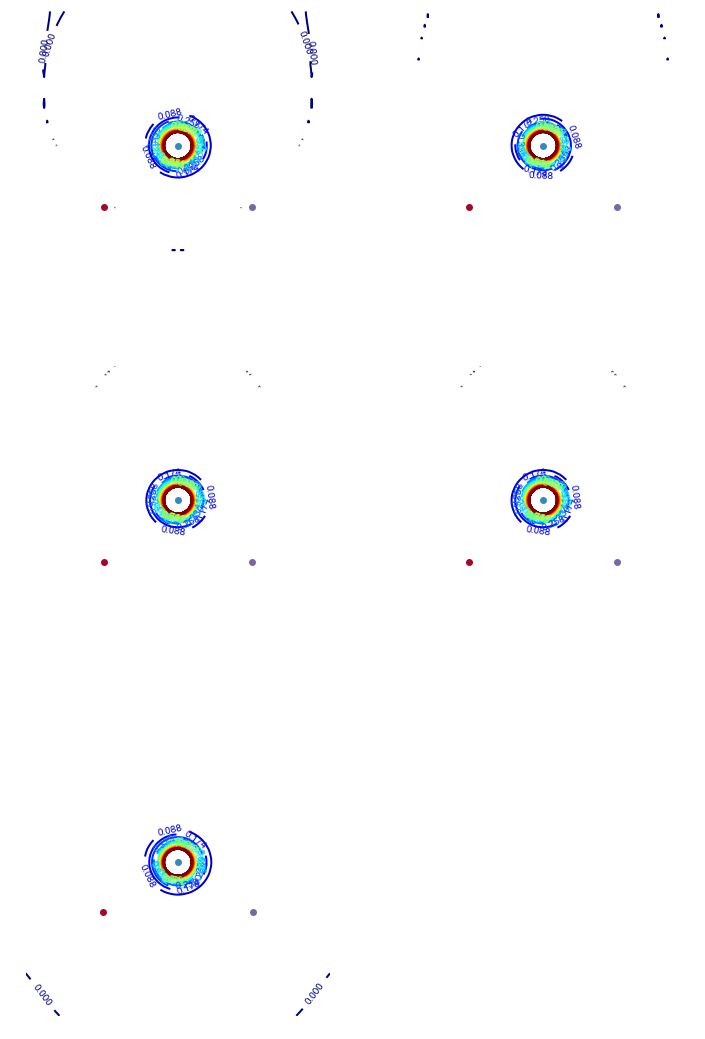

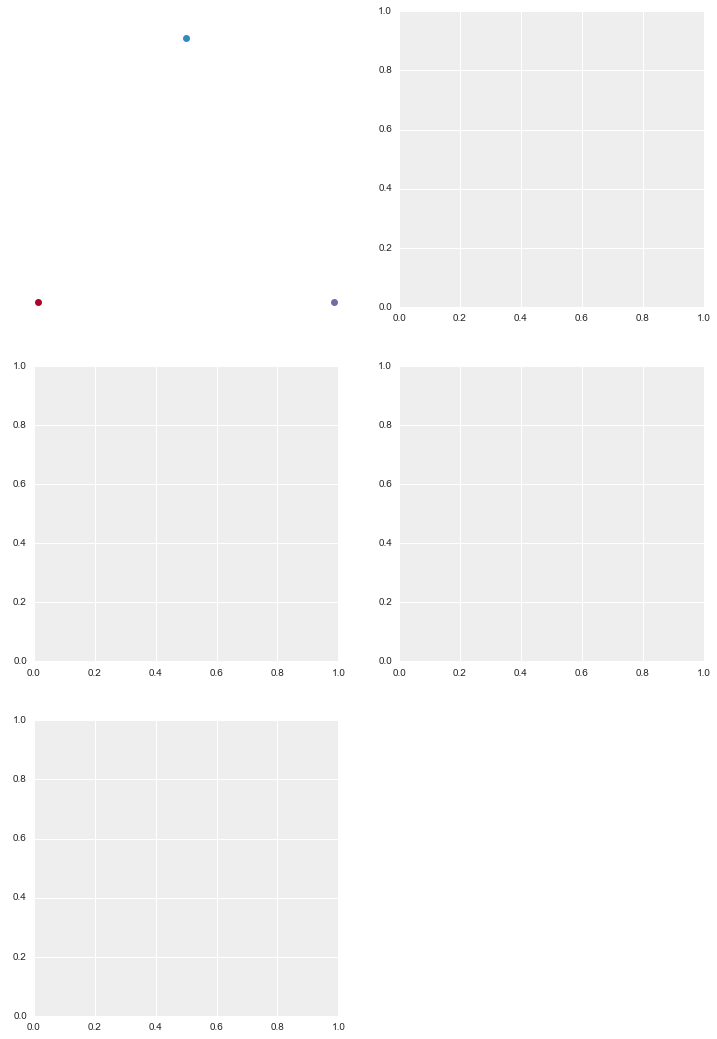

In [107]:
file='h2o-sto-2g'
molfolder ='h2o'
label = ['1','2','3','4','5','6']
listofcolors = [] 
norb = 5
mol = "H2O_alpha_and_z"
print_orbcont_shifted(file,molfolder,label,norb,mol,mos=False,extra=['./h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden','./h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden','h2o/h2o-sto-6g-BFGS_step_0.molden'])

In [ ]:
file='h2o-sto-2g'
molfolder ='h2o'
label = ['Density']
listofcolors = [] 
norb = 4+2+2
mol = "H2O_density"
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./h2o/h2o-a-later-z-sto-2g-BFGS_step_29.molden',
                                                           'h2o/h2o-sto-3g-BFGS_step_0.molden',
                                                           './h2o/h2o-a-later-z-sto-3g-BFGS_step_0.molden',
                                                           './h2o/h2o-a-later-z-sto-3g-BFGS_step_29.molden',
                                                           'h2o/h2o-sto-6g-BFGS_step_0.molden'],density=True,ne=5,lin=True)

['./h2o/h2o-sto-3g-BFGS_step_0.molden', './h2o/h2o-sto-3g-BFGS_step_74.molden', './h2o/h2o-a-later-z-sto-3g-BFGS_step_29.molden', 'h2o/h2o-sto-6g-BFGS_step_0.molden']
False
0 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:273: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


1 0
2 0
3 0
False
0 1
1 1
2 1
3 1
False
0 2
1 2
2 2
3 2
False
0 3
1 3
2 3
3 3
False
0 4
1 4
2 4
3 4
False
0 5
1 5
2 5
3 5
False
0 6
1 6
2 6
3 6
False
0 7
1 7
2 7
3 7


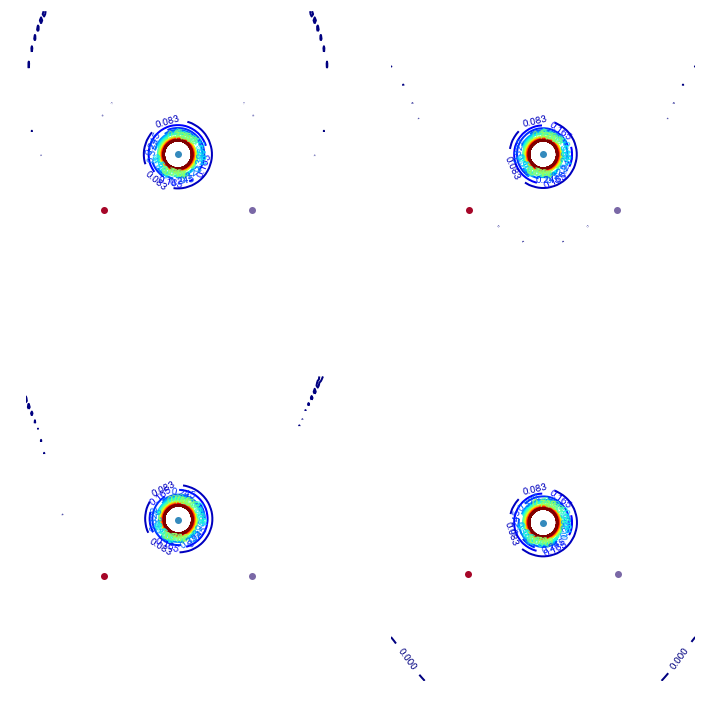

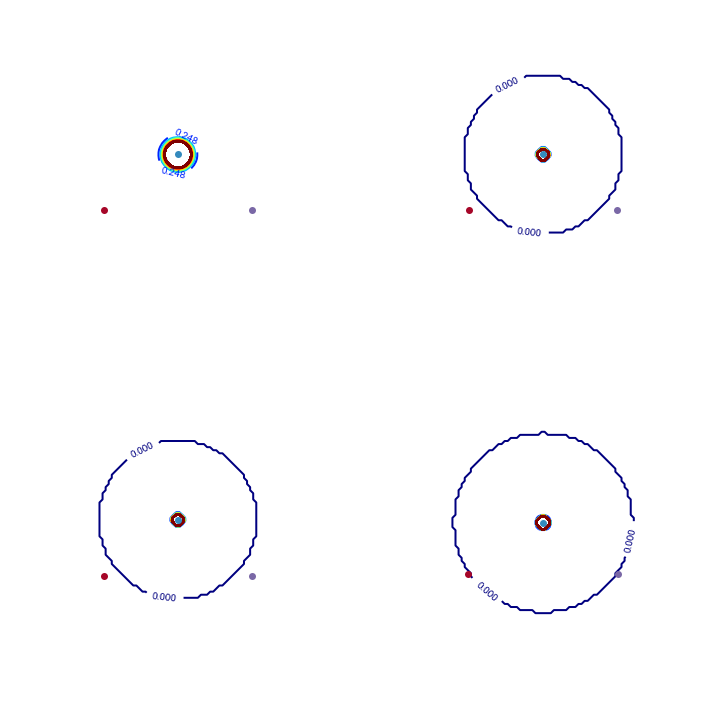

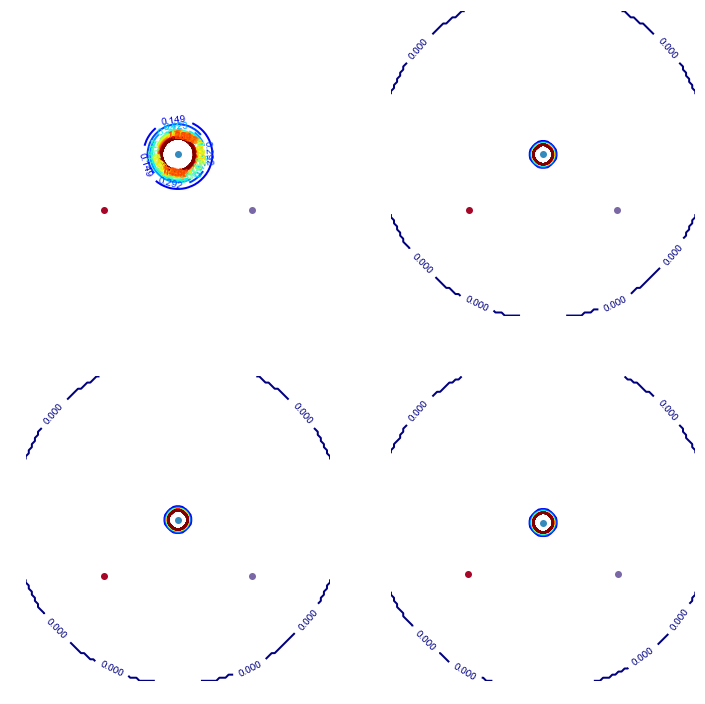

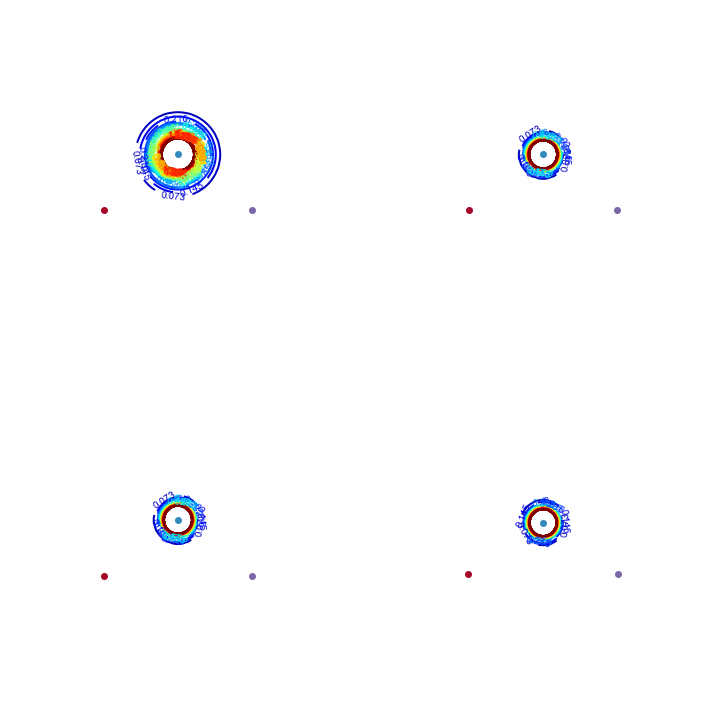

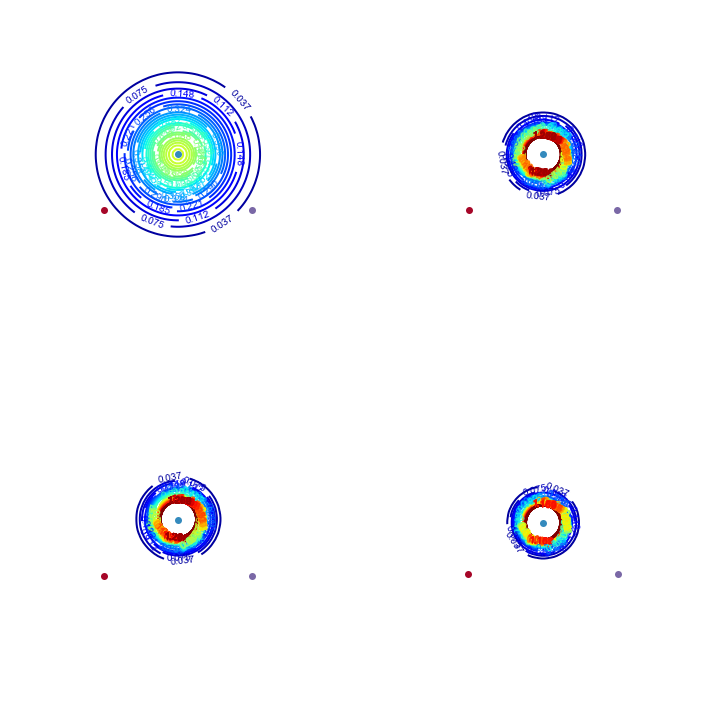

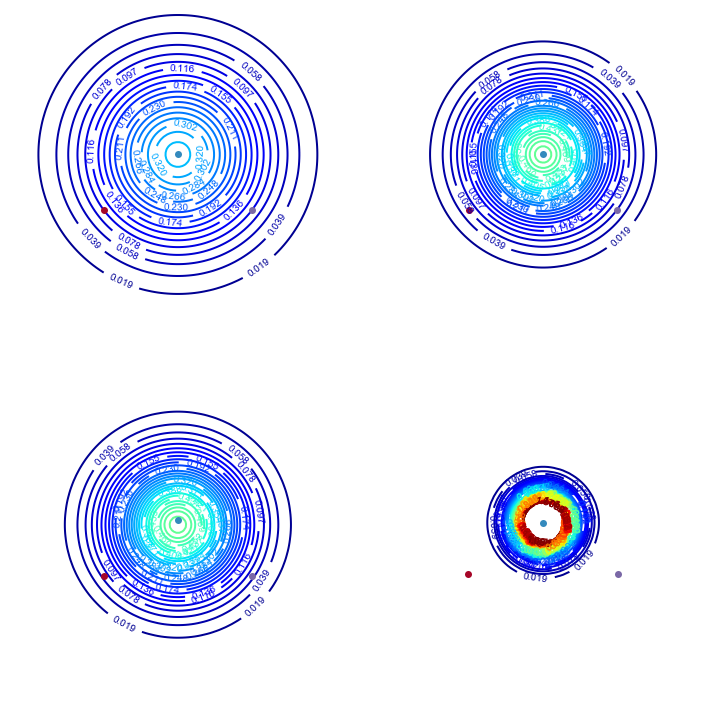

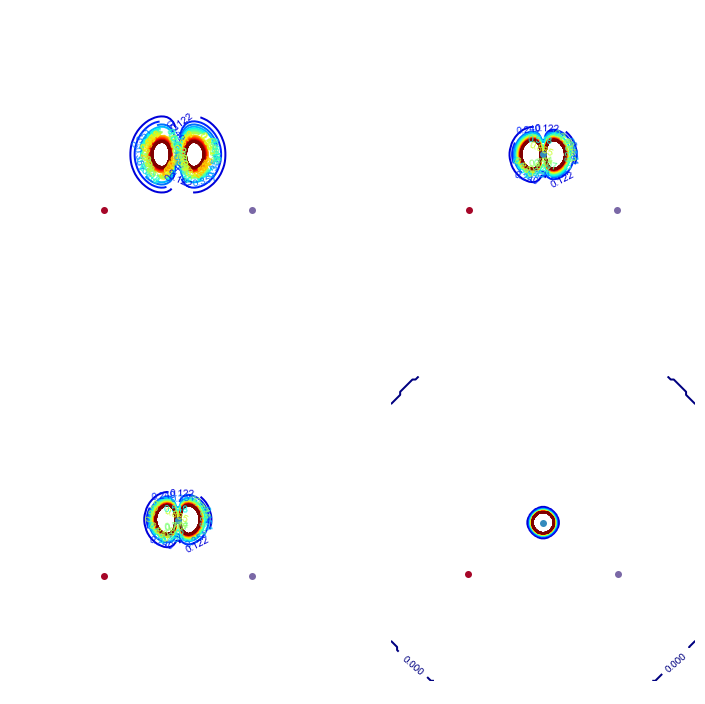

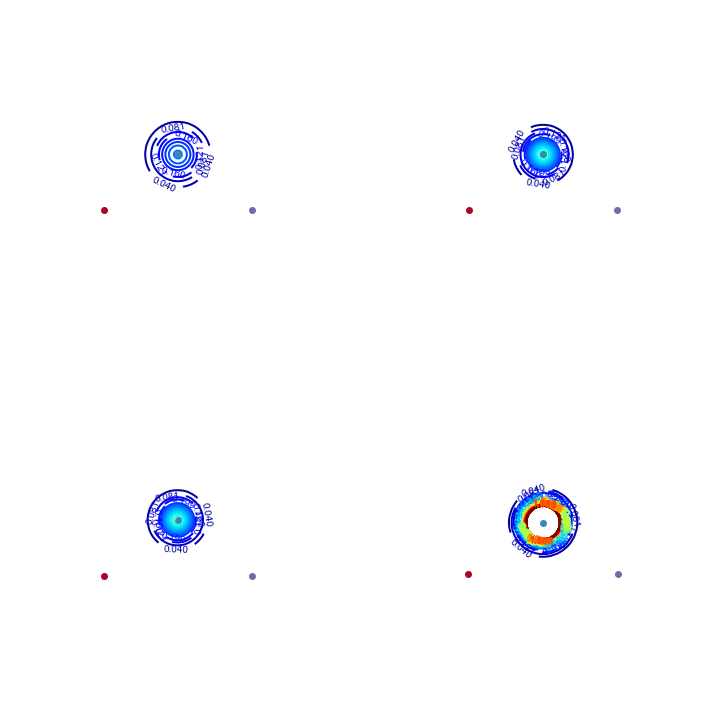

In [50]:
file='h2o-sto-3g'
molfolder ='h2o'
label = ['O 1s','O 2s','O 3s','O 4s','O 2p$_x$','O 2p$_y$','O 2p$_z$', 'O 3p$_x$', 'O 3p$_y$', 'O 3p$_z$',
         'H 1s','1H 2s','H 1s','1H 2s']
listofcolors = [] 
norb = 4+2+2
mol = "H2O_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./h2o/h2o-a-later-z-sto-3g-BFGS_step_29.molden','h2o/h2o-sto-6g-BFGS_step_0.molden'])

In [ ]:
def print_orb_optimization(filenames,label,norb,molname,mos=None,extra=None):
    '''It prints contour surfaces of of MOs and AOs'''
    mols = []
    for tape in filenames:
        mols.append(Molecule(tape))
    print (filenames) 
    natoms = len(mols[0].atoms)
    xarray = np.zeros((natoms, ))
    yarray = np.zeros((natoms, ))
    zarray = np.zeros((natoms, ))
    white = (1,1,1)
    gray = (0.5, 0.5, 0.5)
    red = (1, 0, 0)
    green = (0, 1, 0)
    blue = (0, 0, 1)
    color_dict = {1: (1, 1, 1), 9: red, 3:green, 6: gray, 8: red, 7:green}
    scale_dict = {1: 0.5, 9: 0.6, 7:1.4,  6: 1.5, 8: 1.5, 3:1.5}
    
    dgrid = 100
    y = 0.0
    x = np.linspace(min(xarray)-3.0,max(xarray)+3.0,dgrid)
    z = np.linspace(min(zarray)-3.0,max(zarray)+3.0,dgrid)
    y = np.linspace(min(yarray)-3.0,max(yarray)+3.0,dgrid)

    xs,zs,ys = np.meshgrid(x,y,z)
    cmaps = ['Blues','Reds']
    for j in norb:
        fxyzs = []
        energies = []
        for i, mol in enumerate(mols):
            energies.append(mol.tote)
            if mos == None:
                fxyzs.append(np.absolute(mol.getMOvalue(j,xs,ys,zs, dgrid,nao=j)))
            else:
                fxyzs.append(np.absolute(mol.getMOvalue(j,xs,ys,zs,dgrid)))
                
        limit_max = max([np.amax(fxyz) for fxyz in fxyzs])
        limit_min = min([min([np.amin(fxyz) for fxyz in fxyzs]),1e-06])
        levels = np.arctan(np.linspace(limit_min,limit_max, 10))
        for i,fxyz  in enumerate(fxyzs):
            f = plt.figure(figsize = (12,12))
            plt.title("Optimization for the molecule "+molname+" of"+label[j])
            plt.axis('equal')
            ax1 = plt.subplot2grid((2, 2), (0, 0)) ## Countour
            ax2 = plt.subplot2grid((2, 2), (0, 1)) ## Energy
            for atom in mols[i].atoms:
                   ax1.plot([atom.xyz[0]],[atom.xyz[2]],"o")
            print (i,j)
            #lists[i].contourf(x,z,abs(fxyz[:,dgrid/2,:]),levels,cmap='jet',label='Step: '+str(indexes[j]))
            ax1.axis('off')
            CS = ax1.contour(x,z,abs(fxyz[:,:,dgrid/2]),levels,cmap='jet')
            ax1.clabel(CS, inline=1, fontsize=10)
            ax2.set_ylabel('Hartrees')
            ax2.set_xlabel('Step')
            ax2.plot(range(len(energies)),energies)
            ax2.scatter(range(len(energies)),energies)
            ax2.plot([i],[mols[i].tote],"o",color='red')
            #plt.suptitle("Optimization of "+molname+" with BFGS of "+label[j])
            #pylab.savefig(str(label[j-2].replace(" ",""))+"-"+mol+"-sto-2g.png")
            pylab.savefig(str(i)+".png")
            plt.plot()
            #plt.show()

### This is an Optimization

In [ ]:
filenames = []
prefix = './h2o/h2o-sto-2g-BFGS_step_'
for i in range(30):
    filename = prefix+str(i)+'.molden'
    filenames.append(filename)
prefix = './h2o/h2o-a-later-z-sto-2g-BFGS_step_'
for i in range(0,30):
    filename = prefix+str(i)+'.molden'
    filenames.append(filename)
molfolder ='h2o'
label = ['O 1s','O 2s','O 3s','O 4s','O 2p$_x$','O 2p$_y$','O 2p$_z$', 'O 3p$_x$', 'O 3p$_y$', 'F 3p$_z$',
         'H 1s','1H 2s']
norb = [11]
mol = "H2O"
print_orb_optimization(filenames,label,norb,mol,extra='h2o/h2o-sto-6g-BFGS_step_0.molden')


In [ ]:
filenames = []
prefix = './h2o/h2o-sto-2g-BFGS_step_'
for i in range(30):
    filename = prefix+str(i)+'.molden'
    filenames.append(filename)
prefix = './h2o/h2o-a-later-z-sto-2g-BFGS_step_'
for i in range(0,30):
    filename = prefix+str(i)+'.molden'
    filenames.append(filename)
molfolder ='h2o'
label = ['O 1s','O 2s','O 3s','O 4s','O 2p$_x$','O 2p$_y$','O 2p$_z$', 'O 3p$_x$', 'O 3p$_y$', 'F 3p$_z$',
         'H 1s','1H 2s']
norb = [1]
mol = "H2O"
print_orb_optimization(filenames,label,norb,mol,mos=False,extra='h2o/h2o-sto-6g-BFGS_step_0.molden')

### CH4

In [ ]:
file='ch4-sto-2g'
molfolder ='ch4'
label = ['C 1s','C 2s','C 3s','C 4s','C 2p$_x$','C 2p$_y$','C 2p$_z$', 'C 3p$_x$', 'C 3p$_y$', 'C 3p$_z$',
         'H 1s','1H 2s','H 1s','1H 2s']
listofcolors = [] 
norb = 4+2+2
mol = "CH4_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol)

## NH_3

In [ ]:
file='nh3-sto-2g'
molfolder ='nh3'
label = ['N 1s','N 2s','N 3s','N 4s','N 2p$_x$','N 2p$_y$','N 2p$_z$', 'N 3p$_x$', 'N 3p$_y$', 'N 3p$_z$',
         'H 1s','1H 2s','H 1s','1H 2s']
listofcolors = [] 
norb = 4+2+2
mol = "NH3_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol)

In [ ]:
file='nh3-sto-2g'
molfolder ='nh3'
label = ['N 1s','N 2s','N 3s','N 4s','N 2p$_x$','N 2p$_y$','N 2p$_z$', 'N 3p$_x$', 'N 3p$_y$', 'N 3p$_z$',
         'H 1s','1H 2s','H 1s','1H 2s']
listofcolors = [] 
norb = 4+2+2+2+2
mol = "H2O_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol)

# HF

['./hf/hf-sto-2g-BFGS_step_0.molden', './hf/hf-sto-2g-BFGS_step_40.molden', './hf/hf-z-sto-2g-BFGS_step_55.molden', 'hf/hf-sto-6g-BFGS_step_0.molden']
True
den True
den True
den True
den True
102.868956122 7.06350215619e-10
0 0
1 0
2 0
3 0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:260: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:261: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:273: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


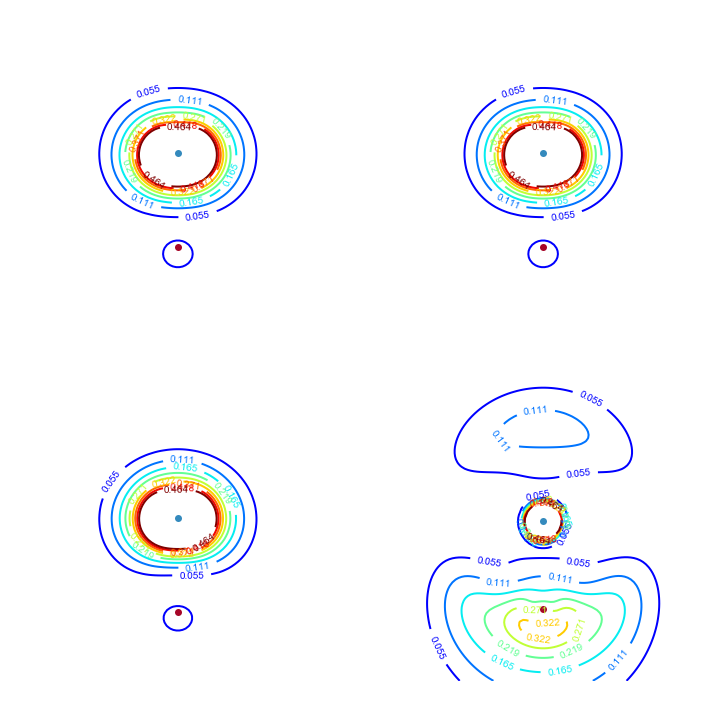

In [62]:
file='hf-sto-2g'
molfolder ='hf'
label = ['Density']
listofcolors = [] 
norb = 4+2+2
mol = "HF_alpha"
print_orbcont_shifted(file,molfolder,label,norb,mol,extra=['./hf/hf-z-sto-2g-BFGS_step_55.molden','hf/hf-sto-6g-BFGS_step_0.molden'],density=True,ne=5,lin=True)